In [142]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

def mid(npArr):
    return npArr.sum() / len(npArr)
def mid(ls):
    return sum(ls) / len(ls)
#Расчет косвенной погрешности, если величина - произведение и частное данных
def sigma_mulls(val, sigsArr, parmsArr):
    sum = 0
    for i in range(len(sigsArr)):
        sum += (sigsArr[i] / parmsArr[i])**2
    return val * (sum)**0.5


#Расчет случайной погрешности среднего
def sigma_rand(valsArr):
    N = len(valsArr)
    valMid = sum(valsArr) / N
    msum = 0
    for val in valsArr:
        msum += (val - valMid)**2
        
    return (msum / (N * (N - 1))) ** 0.5

def sigma_mid_val(vals):
    sum = 0
    m = mid(vals)
    l = len(vals)
    for v in vals:
        sum += (m - v)**2
    return (sum / ((l - 1) * l))**0.5

#MNK если y = kx
##DEPRECATED
def k_only(x, y):
    return mid(x * y) / mid(x * x)

##DEPRECATED
def k_only_sigma(x, y):
    return ((mid(x * x) * mid(y * y) - mid(x * y)**2) / (len(x) * mid(x * x)**2))**0.5

#MNK для y = kx + a
def k_coef(x, y):
    return (mid(x * y) - mid(x) * mid(y)) / (mid(x * x) - mid(x)**2)

def b_coef(x, y):
    return mid(y) - k_coef(x, y) * mid(x)

def k_sigma(x, y):
    return ((mid(y * y) - mid(y)**2) / (mid(x * x) - mid(x)**2) - k_coef(x, y)**2)**0.5  / len(x)**0.5


In [143]:
ls = np.array([
    np.array([31., 91., 151., 210.]),
    np.array([49., 97., 167., 201.]),
    np.array([21., 73., 113., 156.]),
    np.array([52., 92., 135., 180.])
])

SIZE = 4

nus = np.array([2234., 3001, 3250, 3501])
x = np.linspace(0, SIZE - 1, SIZE)


k = np.array([])

for i in range(SIZE):
    k = np.append(k, k_coef(x, ls[i]))
    #print(k[i])

bs = np.array([])
for i in range(SIZE):
        bs = np.append(bs, b_coef(x, ls[i]))


for i in range(SIZE):
    ls[i] -= bs[i]
    bs[i] = 0


[[  0 179]
 [  0 157]
 [  0 133]
 [  0 128]]


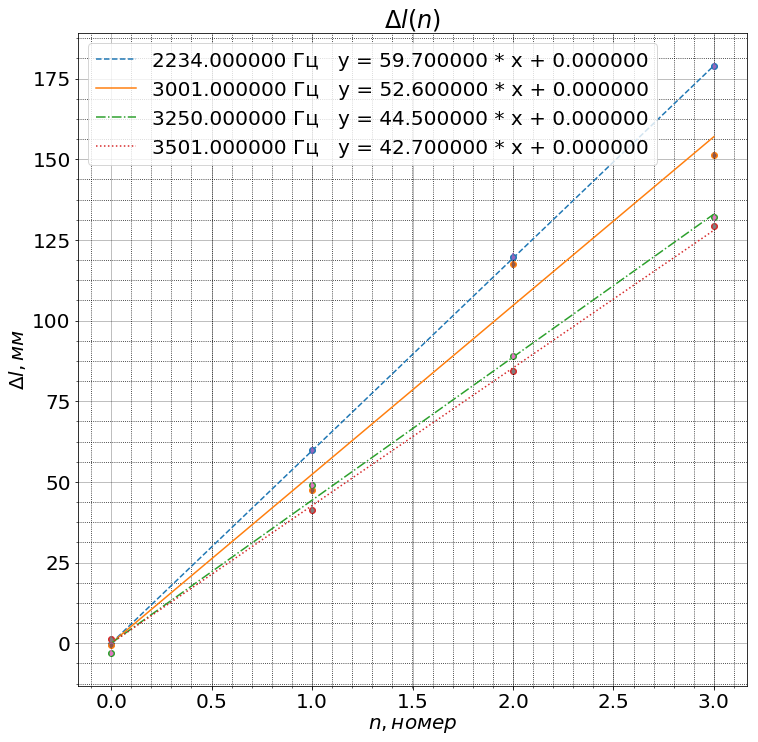

In [144]:

mpl.rcParams['font.size'] = 20 # Управление стилем, в данном случаем - размером шрифта 
    
# y = b + k

fig, ax = plt.subplots()

# Подписываем оси и график
ax.set_title(r"$\Delta l(n)$")
ax.set_ylabel(r"$\Delta l, мм$")
ax.set_xlabel(r"$n, номер$")

fig.set_figwidth(12)
fig.set_figheight(12)


for i in range(SIZE):
        ax.scatter(x, ls[i])

xTwoPoint = np.linspace(0, SIZE - 1, 2)
ys = np.full((SIZE, 2), 0)
for i in range(SIZE):
        ys[i] = xTwoPoint * k[i] + bs[i]
print(ys)

mStyle = ['--', '-', '-.', ':']

for i in range(SIZE):
        ax.plot(xTwoPoint, ys[i], label=r'%f Гц   y = %f * x + %f'%(nus[i], k[i], bs[i]), linestyle=mStyle[i])

# Данные с ошибками
# Можно рисовать ошибки
for i in range(SIZE):
        ax.errorbar(x, ls[i], yerr=1, xerr=0, fmt='.') 

ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

# Активируем легенду графика

# Внимание, запускаете вашу программу как сценарий, то что бы показать график
# Используйте эту команду
plt.legend()
plt.show()

In [150]:
sigs = list()
cs = list()
for i in range(SIZE):
    sigs.append(k_sigma(x, ls[i]))
    cs.append(k[i] * 2 * nus[i] / 1000)
    print(cs[i])
print(mid(cs), sigma_mid_val(cs))


266.7396
315.7052
289.25
298.9854
292.67005 10.224915486


In [153]:


#cs = np.array([323.85, 328.90, 331.94, 333.10, 336.14])
#sigs = np.array([2.3, 2.33, 2.4, 2.37, 2.42])
Ts = np.array([24.1, 24.1, 24.1,24.1, 24.1]) + 273

for i in range(SIZE):
    gam = 44*10**(-3) / (8.314 * Ts[i]) * cs[i]**2
    sigGam = gam * sigs[i] / cs[i] * 2
    print(gam)
    print(sigGam / gam * 100)
    print()


gams = [1.267, 1.775, 1.49, 1.592]
print(mid(gams), sigma_mid_val(gams))



















1.26740377298
0.0918307496415

1.77542967696
2.08767635798

1.49034474218
0.867754565117

1.59235526219
0.375435461408

1.5310000000000001 0.10592214121702791
